# Static Solution - Loads Combos
## *Matteo Franzoi* - Anno Accademico 2019/2020
### matricola 166788 (triennale)
---

In [1]:
import math
#import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sympy import *
from sympy import MatrixSymbol, Matrix
import numpy as np
from engineering_notation import EngNumber
from decimal import Decimal
import pandas as pd

In [2]:
q1 = Symbol('q1', positive=True);
q2 = Symbol('q2', positive=True);
q3 = Symbol('q3', positive=True);
q4 = Symbol('q4', positive=True);
q5 = Symbol('q5', positive=True);
q6 = Symbol('q6', positive=True);
#---------------------------------
ej = Symbol('ej', positive=True);
#---------------------------------
l1 = Symbol('l1', positive=True);
l2 = Symbol('l2', positive=True);
l3 = Symbol('l3', positive=True);
l4 = Symbol('l4', positive=True);
l5 = Symbol('l5', positive=True);
l6 = Symbol('l6', positive=True);
#---------------------------------
m1 = Symbol('m1');
m2 = Symbol('m2');
m3 = Symbol('m3');
m4 = Symbol('m4');
m5 = Symbol('m5');
m6 = Symbol('m6');
m7 = Symbol('m7');

In [3]:
F = 1/(6*ej) * Matrix([
    [ 2*(l1 + l2), l2, 0, 0, 0],
    [ l2, 2*(l2+l3), l3, 0, 0],
    [ 0, l3, 2*(l3+l4), l4, 0],
    [ 0, 0, l4, 2*(l4+l5), l5],
    [ 0, 0, 0, l5, 2*(l5+l6)]
])

In [4]:
Matrix(F)

Matrix([
[(2*l1 + 2*l2)/(6*ej),            l2/(6*ej),                    0,                    0,                    0],
[           l2/(6*ej), (2*l2 + 2*l3)/(6*ej),            l3/(6*ej),                    0,                    0],
[                   0,            l3/(6*ej), (2*l3 + 2*l4)/(6*ej),            l4/(6*ej),                    0],
[                   0,                    0,            l4/(6*ej), (2*l4 + 2*l5)/(6*ej),            l5/(6*ej)],
[                   0,                    0,                    0,            l5/(6*ej), (2*l5 + 2*l6)/(6*ej)]])

In [5]:
X = Matrix([ m2, m3, m4, m5, m6])
Matrix(X)

Matrix([
[m2],
[m3],
[m4],
[m5],
[m6]])

In [6]:
P = -1/(24*ej) * Matrix([
    q1*l1**3 + q2*l2**3,
    q2*l2**3 + q3*l3**3,
    q3*l3**3 + q4*l4**3, 
    q4*l4**3 + q5*l5**3, 
    q5*l5**3 + q6*l6**3            
])
Matrix(P)

Matrix([
[-(l1**3*q1 + l2**3*q2)/(24*ej)],
[-(l2**3*q2 + l3**3*q3)/(24*ej)],
[-(l3**3*q3 + l4**3*q4)/(24*ej)],
[-(l4**3*q4 + l5**3*q5)/(24*ej)],
[-(l5**3*q5 + l6**3*q6)/(24*ej)]])

In [7]:
def rij_q(mij, mi_j, li, qi):
       return (mi_j - mij)/li + qi* li/2
    
def rij(mij, mi_j, li):
    return (mi_j-mij)/li 


In [8]:
# E = 31476 MPa

def EJ(b,h, E):
    """Concrete Rectangular Section:
    J = b * h^3 / 12 [mm^4]
    E = 31476 [MPa]
    Result in N*mm^2"""
    return E * b * h**3 /12
    
EJ = EJ(300, 500, 31476)/1000
print('EJ = ',EJ, 'kN mm^2 = ', Decimal(EJ).normalize().to_eng_string(),'kN mm^2')
EJ = EJ*10**6 
print('EJ = ',EJ, 'kN m^2 = ', Decimal(EJ).normalize().to_eng_string(),'kN m^2')

EJ =  98362500000.0 kN mm^2 =  98.3625E+9 kN mm^2
EJ =  9.83625e+16 kN m^2 =  98.3625E+15 kN m^2


In [9]:
F1 = F.evalf(subs={l1:3.000, l2:4.500, l3:4.000, l4:5.000, l5:6.150, l6:4.000, ej:EJ})
Fn = F1;
F1

Matrix([
[ 2.5416190113102e-17, 7.62485703393061e-18,                    0,                    0,                    0],
[7.62485703393061e-18, 2.88050154615157e-17, 6.77765069682721e-18,                    0,                    0],
[                   0, 6.77765069682721e-18, 3.04994281357225e-17, 8.47206337103401e-18,                    0],
[                   0,                    0, 8.47206337103401e-18, 3.77854026348117e-17, 1.04206379463718e-17],
[                   0,                    0,                    0, 1.04206379463718e-17, 3.43965772863981e-17]])

In [10]:
P1 = P.subs(list(zip([l1, l2, l3, l4, l5, l6, ej, q1, q2, q3, q4, q5, q6], [3.000, 4.500, 4.000, 5.000, 6.150, 4.000, EJ, 1, 0, 0, 0, 0, 0])))
P1

Matrix([
[-1.14372855508959e-17],
[                    0],
[                    0],
[                    0],
[                    0]])

In [11]:
sol1 = solve(F1 * X - P1, X)
X1 = list(sol1.values())
X1.insert(0, 0)
X1.insert(6, 0)
Matrix(X1)

Matrix([
[                   0],
[    -0.4913369425523],
[   0.137789808507666],
[ -0.0328526257862429],
[ 0.00803760602434188],
[-0.00243503827831046],
[                   0]])

In [12]:
R11 = rij_q(X1[0], X1[1], 3, 1);
R21 = rij(X1[1], X1[2], 4.5);
R31 = rij(X1[2], X1[3], 4);
R41 = rij(X1[3], X1[4], 5);
R51 = rij(X1[4], X1[5], 6.15);
R61 = rij(X1[5], X1[6], 4);
R1 = np.array([R11, R21, R31, R41, R51, R61])
Matrix(R1)

Matrix([
[    1.33622101914923],
[   0.139805944679992],
[ -0.0426606085734773],
[ 0.00817804636211696],
[-0.00170286899230119],
[0.000608759569577615]])

In [13]:
def H(s):
    if s <= 0:
        return 0
    else:
        return 1
Hv = np.vectorize(H)

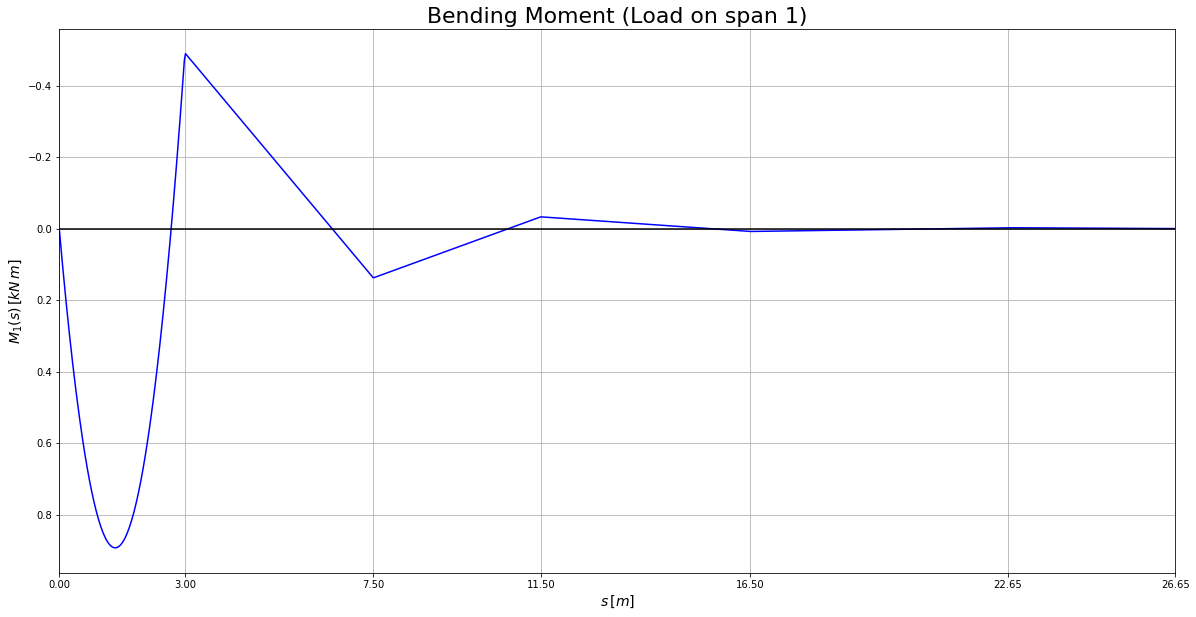

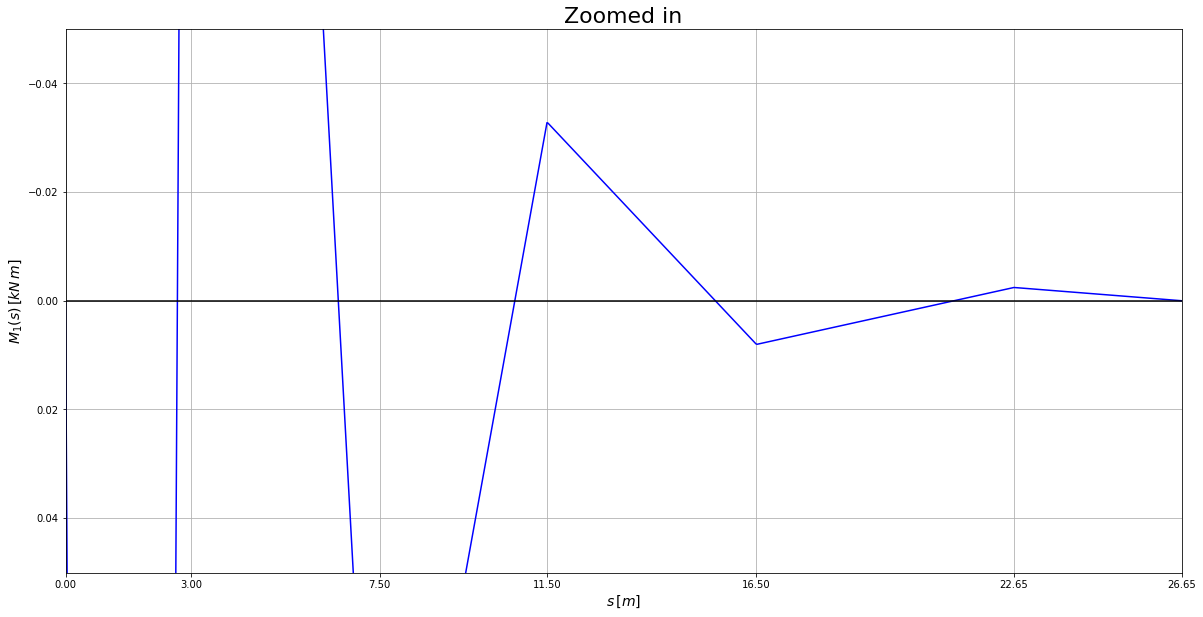

In [14]:
s = np.linspace(0,26.65, num=1000)
M1 = (X1[0] + R1[0] * s - s**2 /2) * (Hv(s) - Hv(s-3)) + (X1[1] + R1[1]*(s-3)) * (Hv(s-3) - Hv(s-(3+4.5))) + (X1[2] + R1[2]*(s-(3+4.5)))*(Hv(s-(3+4.5)) - Hv(s-(3+4.5+4))) + (X1[3] + R1[3]*(s-(3+4.5+4)))* (Hv(s-(3+4.5+4)) - Hv(s-(3+4.5+4+5))) + (X1[4] + R1[4]*(s-(3+4.5+4+5))) * (Hv(s-(3+4.5+4+5)) - Hv(s-(3+4.5+4+5+6.15))) + (X1[5] + R1[5]*(s-(3+4.5+4+5+6.15))) * (Hv(s-(3+4.5+4+5+6.15)) - Hv(s-(3+4.5+4+5+6.15+4)))

#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, M1, color='blue')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_1(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Bending Moment (Load on span 1)', fontsize='22')
plt.show()

#-------------ZOOM-------------------

plt.subplots(1,1, figsize=(20,10))
ax3 = plt.subplot()
ax3.plot(s, M1, color='blue')
ax3.set_xlim(15, 26.65) 
ax3.set_ylim(-.05, .05)
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_1(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
ax3.axhline(0, color='black')
ax3.set_title('Zoomed in', fontsize='22')
plt.show()

---
#### Load on Span 2

In [15]:
P2 = P.subs(list(zip([l1, l2, l3, l4, l5, l6, ej, q1, q2, q3, q4, q5, q6], [3, 4.5, 4, 5, 6.15, 4, EJ, 0, 1, 0, 0, 0, 0])))
P2

Matrix([
[-3.86008387342737e-17],
[-3.86008387342737e-17],
[                    0],
[                    0],
[                    0]])

In [16]:
sol2 = solve(Fn * X - P2, X)
X2 = list(sol2.values())
X2.insert(0, 0)
X2.insert(6, 0)
Matrix(X2)

Matrix([
[                  0],
[  -1.19322157740064],
[  -1.08509474199787],
[  0.258714428066663],
[-0.0632961474416922],
[ 0.0191759264416949],
[                  0]])

In [17]:
R12 = rij(X2[0], X2[1], 3);
R22 = rij_q(X2[1], X2[2], 4.5, 1);
R32 = rij(X2[2], X2[3], 4);
R42 = rij(X2[3], X2[4], 5);
R52 = rij(X2[4], X2[5], 6.15);
R62 = rij(X2[5], X2[6], 4);
R2 = np.array([R12, R22, R32, R42, R52, R62])
Matrix(R2)

Matrix([
[  -0.397740525800213],
[    2.27402818564506],
[   0.335952292516133],
[  -0.064402115101671],
[  0.0134100933143719],
[-0.00479398161042372]])

In [18]:
s = np.linspace(0,26.65, num=1000)
M2 = (X2[0] + R2[0] * s) * (Hv(s) - Hv(s-3)) + (X2[1] + R2[1]*(s-3) - 1*(s-3)**2 /2) * (Hv(s-3) - Hv(s-(3+4.5))) + (X2[2] + R2[2]*(s-(3+4.5)))*(Hv(s-(3+4.5)) - Hv(s-(3+4.5+4))) + (X2[3] + R2[3]*(s-(3+4.5+4)))* (Hv(s-(3+4.5+4)) - Hv(s-(3+4.5+4+5))) + (X2[4] + R2[4]*(s-(3+4.5+4+5))) * (Hv(s-(3+4.5+4+5)) - Hv(s-(3+4.5+4+5+6.15))) + (X2[5] + R2[5]*(s-(3+4.5+4+5+6.15))) * (Hv(s-(3+4.5+4+5+6.15)) - Hv(s-(3+4.5+4+5+6.15+4)))

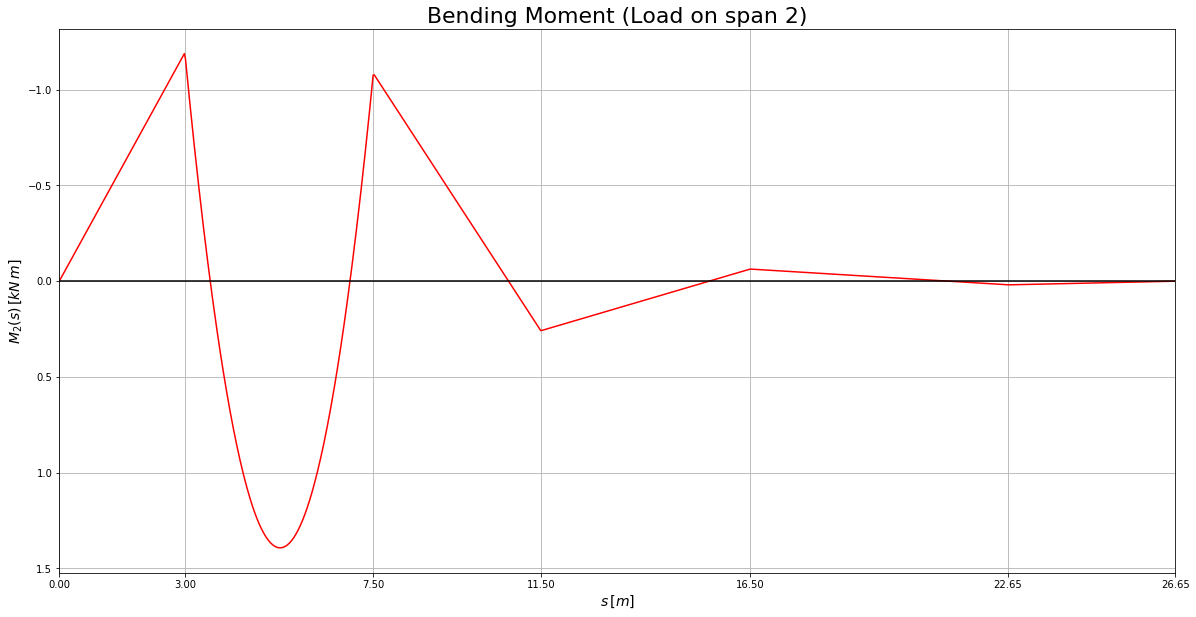

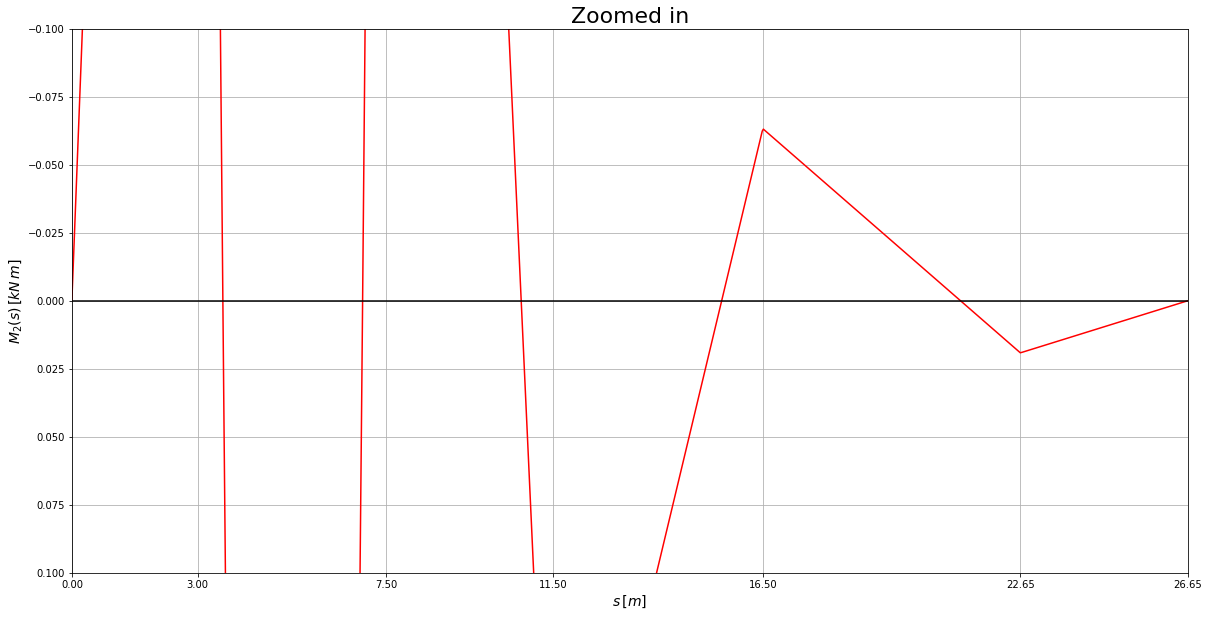

In [19]:
#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, M2, color='red')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_2(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Bending Moment (Load on span 2)', fontsize='22')
plt.show()

#-------------ZOOM-------------------

plt.subplots(1,1, figsize=(20,10))
ax3 = plt.subplot()
ax3.plot(s, M2, color='red')
ax3.set_xlim(16, 26.65) 
ax3.set_ylim(-.1, .1)
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_2(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
ax3.axhline(0, color='black')
ax3.set_title('Zoomed in', fontsize='22')
plt.show()

---
#### Load on Span 3

In [20]:
P3 = P.subs(list(zip([l1, l2, l3, l4, l5, l6, ej, q1, q2, q3, q4, q5, q6], [3, 4.5, 4, 5, 6.15, 4, EJ, 0, 0, 1, 0, 0, 0])))
P3

Matrix([
[                    0],
[-2.71106027873088e-17],
[-2.71106027873088e-17],
[                    0],
[                    0]])

In [21]:
sol3 = solve(Fn * X - P3, X)
X3 = list(sol3.values())
X3.insert(0, 0)
X3.insert(6, 0)
Matrix(X3)

Matrix([
[                  0],
[  0.248739988673004],
[ -0.829133295576679],
[ -0.756015981056257],
[  0.184964168263867],
[-0.0560359426021074],
[                  0]])

In [22]:
R13 = rij(X3[0], X3[1], 3);
R23 = rij(X3[1], X3[2], 4.5);
R33 = rij_q(X3[2], X3[3], 4, 1);
R43 = rij(X3[3], X3[4], 5);
R53 = rij(X3[4], X3[5], 6.15);
R63 = rij(X3[5], X3[6], 4);
R3 = np.array([R13, R23, R33, R43, R53, R63])
Matrix(R3)

Matrix([
[  0.082913329557668],
[  -0.23952739649993],
[   2.01827932863011],
[  0.188196029864025],
[-0.0391870098969065],
[ 0.0140089856505269]])

In [23]:
s = np.linspace(0,26.65, num=1000)
M3 = (X3[0] + R3[0] * s) * (Hv(s) - Hv(s-3)) + (X3[1] + R3[1]*(s-3)) * (Hv(s-3) - Hv(s-(3+4.5))) + (X3[2] + R3[2]*(s-(3+4.5)) - 1*(s-(3+4.5))**2 /2)*(Hv(s-(3+4.5)) - Hv(s-(3+4.5+4))) + (X3[3] + R3[3]*(s-(3+4.5+4)))* (Hv(s-(3+4.5+4)) - Hv(s-(3+4.5+4+5))) + (X3[4] + R3[4]*(s-(3+4.5+4+5))) * (Hv(s-(3+4.5+4+5)) - Hv(s-(3+4.5+4+5+6.15))) + (X3[5] + R3[5]*(s-(3+4.5+4+5+6.15))) * (Hv(s-(3+4.5+4+5+6.15)) - Hv(s-(3+4.5+4+5+6.15+4)))

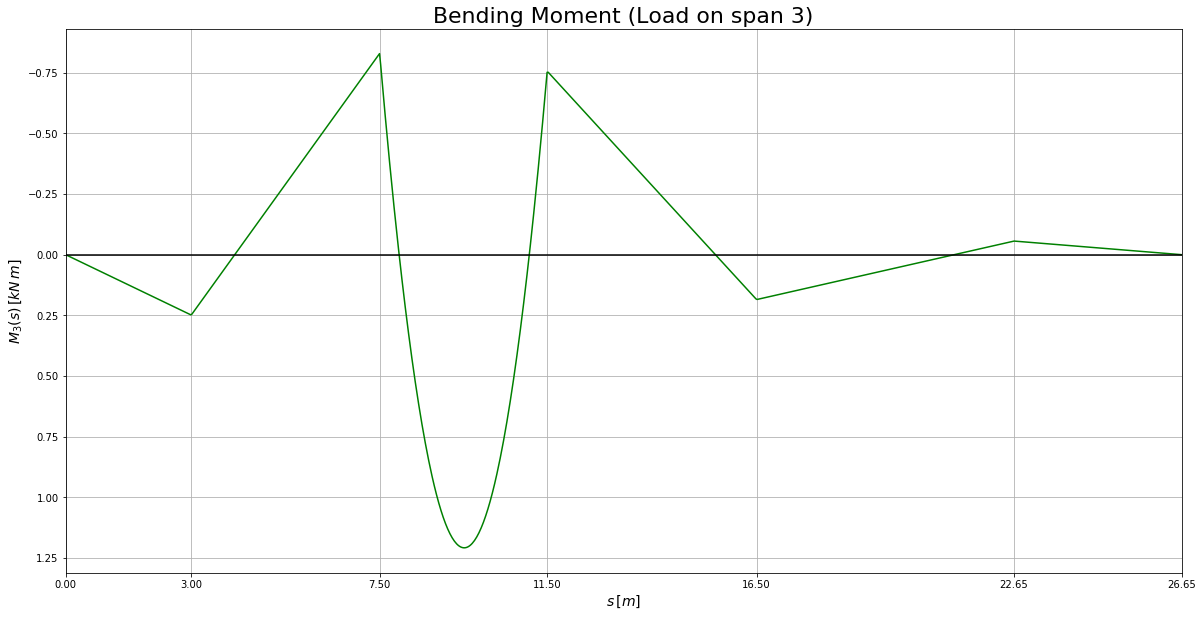

In [24]:
#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, M3, color='green')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_3(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Bending Moment (Load on span 3)', fontsize='22')
plt.show()

---
#### Load on Span 4

In [25]:
P4 = P.subs(list(zip([l1, l2, l3, l4, l5, l6, ej, q1, q2, q3, q4, q5, q6], [3, 4.5, 4, 5, 6.15, 4, EJ, 0, 0, 0, 1, 0, 0])))
P4

Matrix([
[                    0],
[                    0],
[-5.29503960689626e-17],
[-5.29503960689626e-17],
[                    0]])

In [26]:
sol4 = solve(Fn * X - P4, X)
X4 = list(sol4.values())
X4.insert(0, 0)
X4.insert(6, 0)
Matrix(X4)

Matrix([
[                 0],
[-0.114884350749542],
[ 0.382947835831807],
[ -1.49828340769194],
[ -1.16253800097445],
[ 0.352197473201618],
[                 0]])

In [27]:
R14 = rij(X4[0], X4[1], 3);
R24 = rij(X4[1], X4[2], 4.5);
R34 = rij(X4[2], X4[3], 4);
R44 = rij_q(X4[3], X4[4], 5, 1);
R54 = rij(X4[4], X4[5], 6.15);
R64 = rij(X4[5], X4[6], 4);
R4 = np.array([R14, R24, R34, R44, R54, R64])
Matrix(R4)

Matrix([
[-0.0382947835831807],
[  0.110629374795855],
[ -0.470307810880937],
[    2.5671490813435],
[   0.24629845108554],
[-0.0880493683004045]])

In [28]:
s = np.linspace(0,26.65, num=1000)
M4 = (X4[0] + R4[0] * s) * (Hv(s) - Hv(s-3)) + (X4[1] + R4[1]*(s-3)) * (Hv(s-3) - Hv(s-(3+4.5))) + (X4[2] + R4[2]*(s-(3+4.5)))*(Hv(s-(3+4.5)) - Hv(s-(3+4.5+4))) + (X4[3] + R4[3]*(s-(3+4.5+4)) - 1* (s-(3+4.5+4))**2 /2)* (Hv(s-(3+4.5+4)) - Hv(s-(3+4.5+4+5))) + (X4[4] + R4[4]*(s-(3+4.5+4+5))) * (Hv(s-(3+4.5+4+5)) - Hv(s-(3+4.5+4+5+6.15))) + (X4[5] + R4[5]*(s-(3+4.5+4+5+6.15))) * (Hv(s-(3+4.5+4+5+6.15)) - Hv(s-(3+4.5+4+5+6.15+4)))

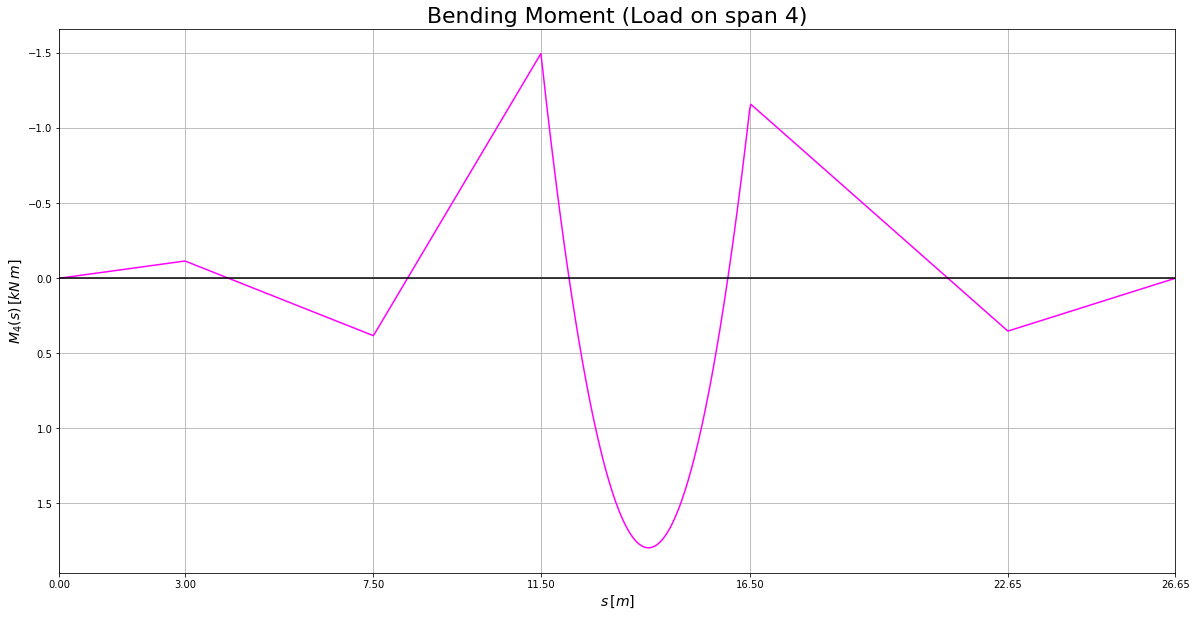

In [29]:
#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, M4, color='magenta')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_4(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Bending Moment (Load on span 4)', fontsize='22')
plt.show()


---
#### Load on Span 5

In [30]:
P5 = P.subs(list(zip([l1, l2, l3, l4, l5, l6, ej, q1, q2, q3, q4, q5, q6], [3, 4.5, 4, 5, 6.15, 4, EJ, 0, 0, 0, 0, 1, 0])))
P5

Matrix([
[                    0],
[                    0],
[                    0],
[-9.85336446816622e-17],
[-9.85336446816622e-17]])

In [31]:
sol5 = solve(Fn * X - P5, X)
X5 = list(sol5.values())
X5.insert(0, 0)
X5.insert(6, 0)
Matrix(X5)

Matrix([
[                0],
[0.048266821453029],
[-0.16088940484343],
[0.629479796449918],
[-2.13741574334497],
[-2.21709295213933],
[                0]])

In [32]:
R15 = rij(X5[0], X5[1], 3);
R25 = rij(X5[1], X5[2], 4.5);
R35 = rij(X5[2], X5[3], 4);
R45 = rij(X5[3], X5[4], 5);
R55 = rij_q(X5[4], X5[5], 6.15, 1);
R65 = rij(X5[5], X5[6], 4);
R5 = np.array([R15, R25, R35, R45, R55, R65])
Matrix(R5)

Matrix([
[  0.016088940484343],
[-0.0464791613992131],
[  0.197592300323337],
[ -0.553379107958977],
[    3.0620443562936],
[  0.554273238034834]])

In [33]:
s = np.linspace(0,26.65, num=1000)
M5 = (X5[0] + R5[0] * s) * (Hv(s) - Hv(s-3)) + (X5[1] + R5[1]*(s-3)) * (Hv(s-3) - Hv(s-(3+4.5))) + (X5[2] + R5[2]*(s-(3+4.5)))*(Hv(s-(3+4.5)) - Hv(s-(3+4.5+4))) + (X5[3] + R5[3]*(s-(3+4.5+4)))* (Hv(s-(3+4.5+4)) - Hv(s-(3+4.5+4+5))) + (X5[4] + R5[4]*(s-(3+4.5+4+5)) - 1*(s-(3+4.5+4+5))**2 /2) * (Hv(s-(3+4.5+4+5)) - Hv(s-(3+4.5+4+5+6.15))) + (X5[5] + R5[5]*(s-(3+4.5+4+5+6.15))) * (Hv(s-(3+4.5+4+5+6.15)) - Hv(s-(3+4.5+4+5+6.15+4)))

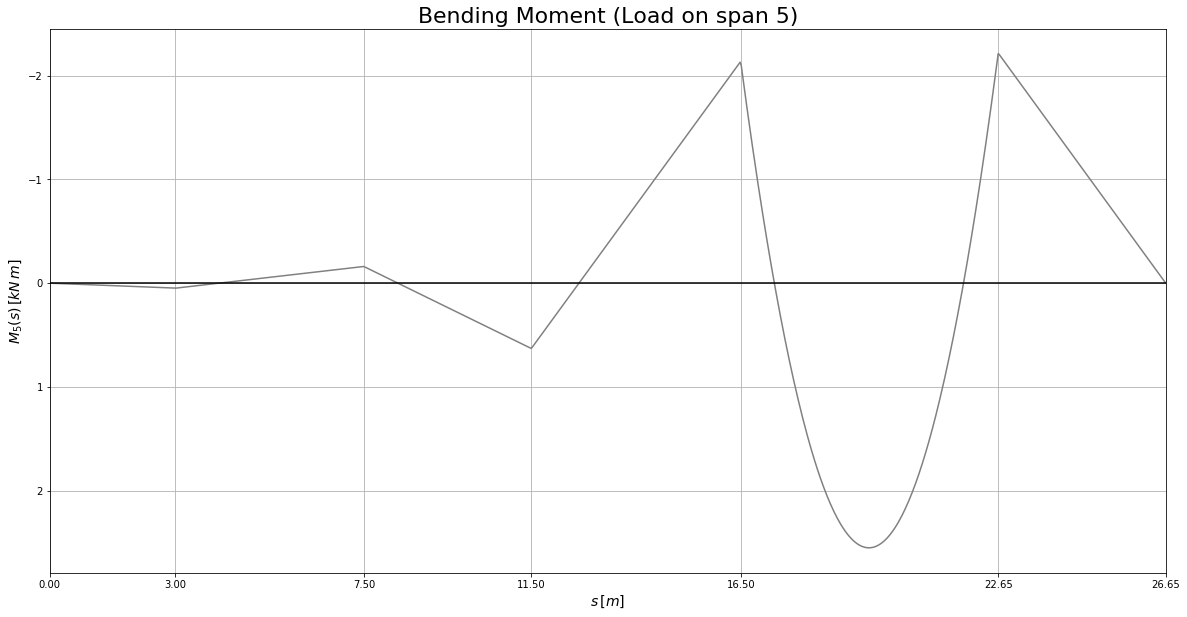

In [34]:
#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, M5, color='gray')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_5(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Bending Moment (Load on span 5)', fontsize='22')
plt.show()

---
#### Load on Span 6

In [35]:
P6 = P.subs(list(zip([l1, l2, l3, l4, l5, l6, ej, q1, q2, q3, q4, q5, q6], [3, 4.5, 4, 5, 6.15, 4, EJ, 0, 0, 0, 0, 0, 1])))
P6

Matrix([
[                    0],
[                    0],
[                    0],
[                    0],
[-2.71106027873088e-17]])

In [36]:
sol6 = solve(Fn * X - P6, X)
X6 = list(sol6.values())
X6.insert(0, 0)
X6.insert(6, 0)
Matrix(X6)

Matrix([
[                   0],
[-0.00577194258562482],
[  0.0192398086187494],
[ -0.0752757512208568],
[   0.255600857500086],
[  -0.865613067666283],
[                   0]])

In [37]:
R16 = rij(X6[0], X6[1], 3);
R26 = rij(X6[1], X6[2], 4.5);
R36 = rij(X6[2], X6[3], 4);
R46 = rij(X6[3], X6[4], 5);
R56 = rij(X6[4], X6[5], 6.15);
R66 = rij_q(X6[5], X6[6], 4, 1);
R6 = np.array([R16, R26, R36, R46, R56, R66])
Matrix(R6)

Matrix([
[-0.00192398086187494],
[ 0.00555816693430538],
[ -0.0236288899599015],
[  0.0661753217441885],
[  -0.182311207344125],
[    2.21640326691657]])

In [38]:
s = np.linspace(0,26.65, num=1000)
M6 = (X6[0] + R6[0] * s) * (Hv(s) - Hv(s-3)) + (X6[1] + R6[1]*(s-3)) * (Hv(s-3) - Hv(s-(3+4.5))) + (X6[2] + R6[2]*(s-(3+4.5)))*(Hv(s-(3+4.5)) - Hv(s-(3+4.5+4))) + (X6[3] + R6[3]*(s-(3+4.5+4)))* (Hv(s-(3+4.5+4)) - Hv(s-(3+4.5+4+5))) + (X6[4] + R6[4]*(s-(3+4.5+4+5))) * (Hv(s-(3+4.5+4+5)) - Hv(s-(3+4.5+4+5+6.15))) + (X6[5] + R6[5]*(s-(3+4.5+4+5+6.15)) -  1 *(s-(3+4.5+4+5+6.15))**2 /2) * (Hv(s-(3+4.5+4+5+6.15)) - Hv(s-(3+4.5+4+5+6.15+4)))

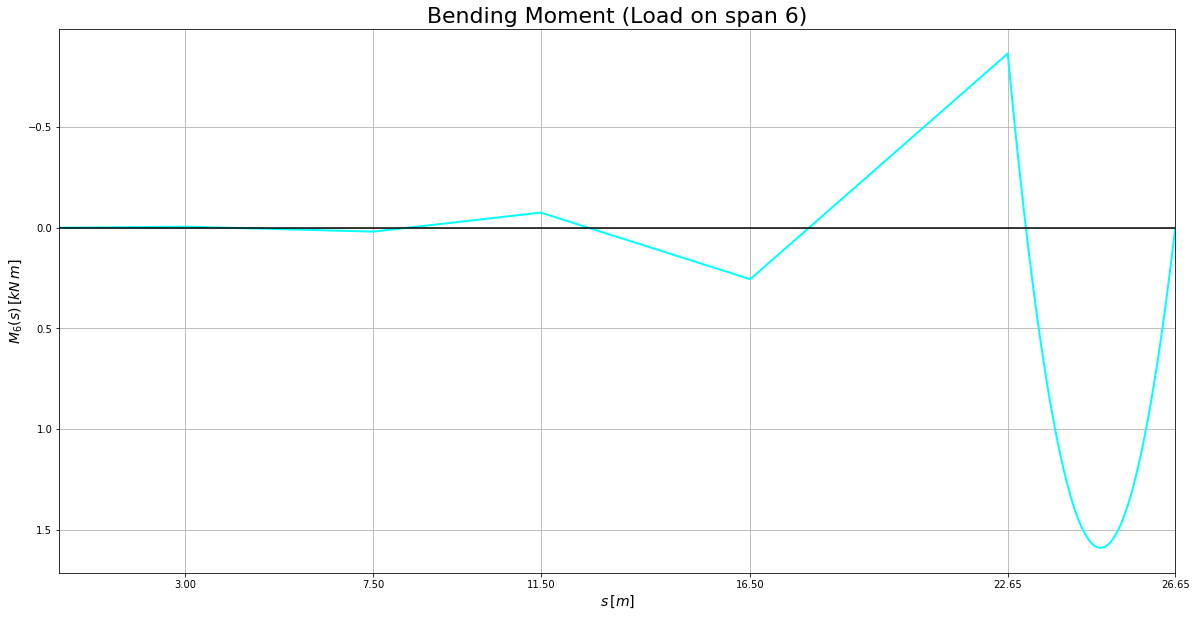

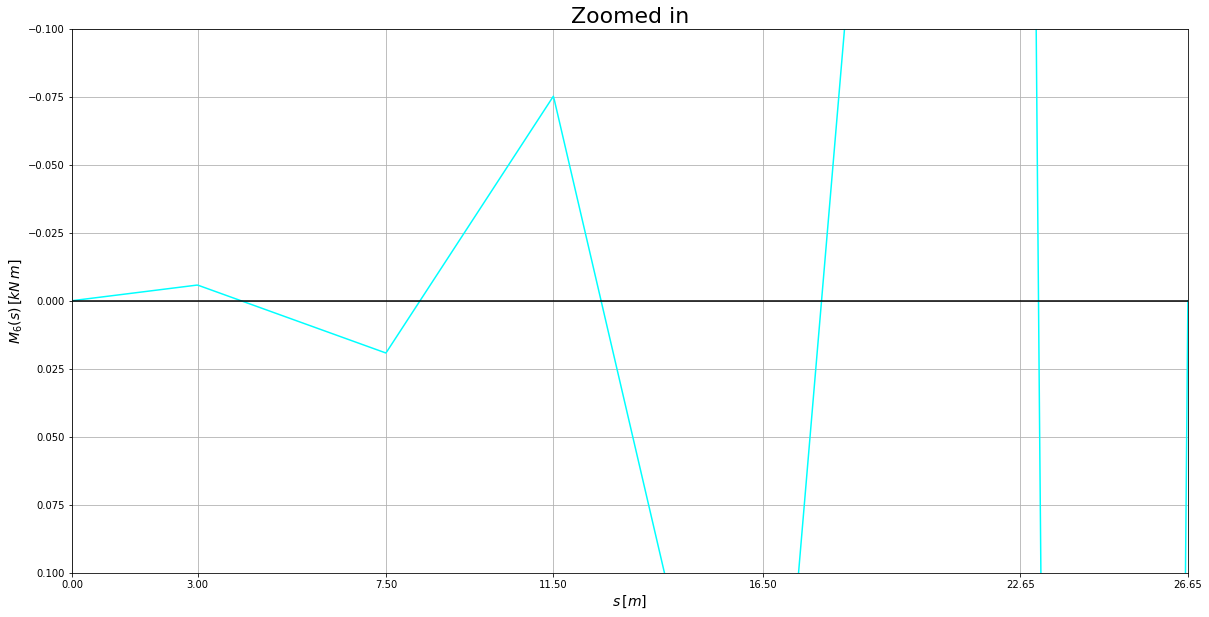

In [39]:
#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, M6, color='cyan', linewidth='2')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_6(s)\,[kN\,m]$', fontsize='14')
plt.xticks([3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Bending Moment (Load on span 6)', fontsize='22')
plt.show()

#-------------ZOOM-------------------

plt.subplots(1,1, figsize=(20,10))
ax3 = plt.subplot()
ax3.plot(s, M6, color='cyan')
ax3.set_xlim(0, 7.5) 
ax3.set_ylim(-.1, .1)
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_6(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
ax3.axhline(0, color='black')
ax3.set_title('Zoomed in', fontsize='22')
plt.show()


---

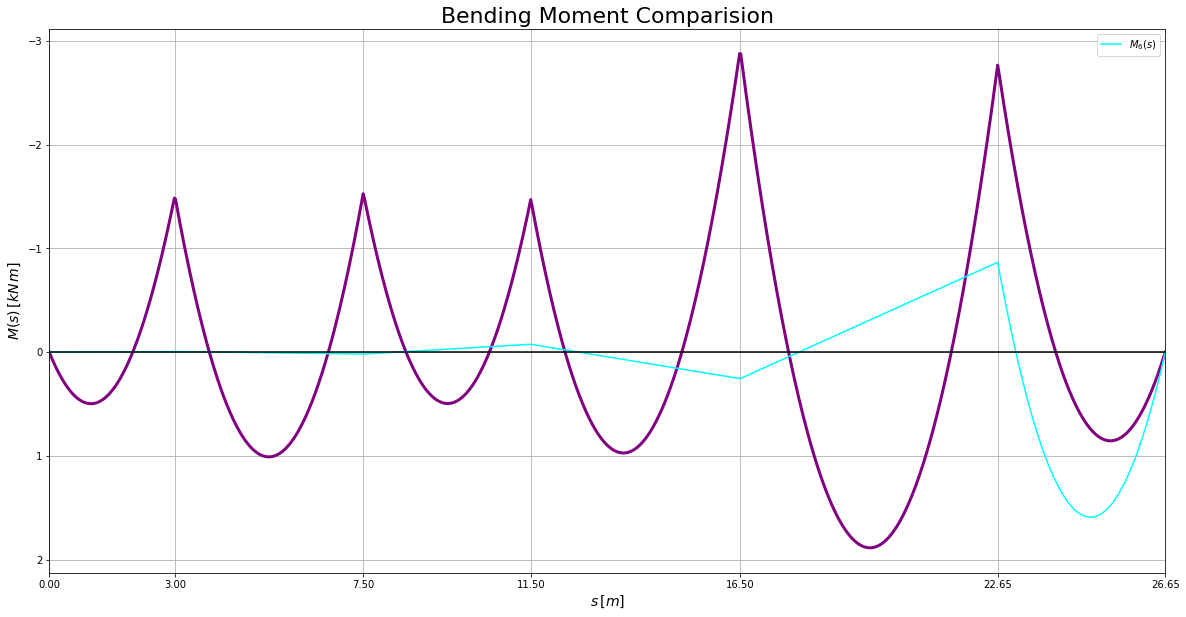

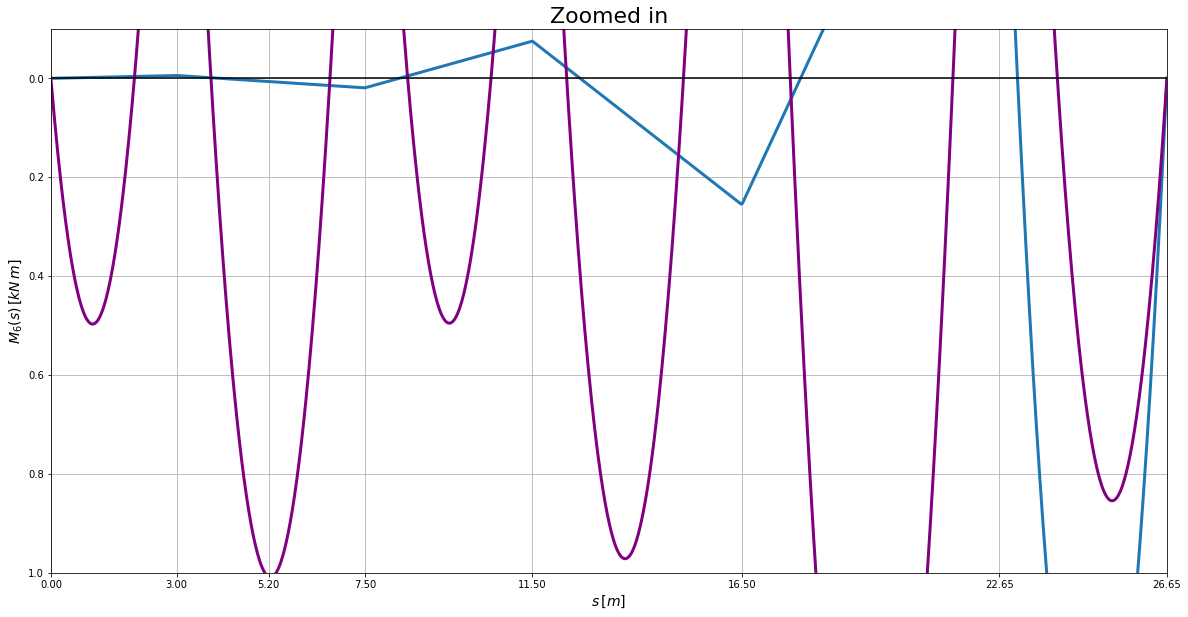

In [40]:
s = np.linspace(0,26.65, num=1000)

plt.figure(figsize=(20,10))

plt.plot(s, M1+M2+M3+M4+M5+M6, color='purple', linewidth='3')

#plt.plot(s, M1, color='blue', label=r'$M_1(s)$')
#plt.plot(s, M2, color='red', label=r'$M_2(s)$')
#plt.plot(s, M3, color='green', label=r'$M_3(s)$')
#plt.plot(s, M4, color='magenta', label=r'$M_4(s)$')
#plt.plot(s, M5, color='gray', label=r'$M_5(s)$')
plt.plot(s, M6, color='cyan', label=r'$M_6(s)$')
plt.xlim(s.min(), s.max())
plt.legend()
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Bending Moment Comparision', fontsize='22')



plt.subplots(1,1, figsize=(20,10))
ax3 = plt.subplot()
ax3.plot(s, M6, linewidth='3')
ax3.set_xlim(0, 3) 
ax3.set_ylim(-.1, 1)
plt.plot(s, M1+M2+M3+M4+M5+M6, color='purple', linewidth='3')
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_6(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 5.2 ,7.5, 11.5, 16.5, 22.65, 26.65])
ax3.axhline(0, color='black')
ax3.set_title('Zoomed in', fontsize='22')
plt.show()



plt.show()

---
### CARICHI

In [43]:
Q1max_slu = 134.92;
Q1min_slu = 46.25

Q2max_slu = 101.32
Q2min_slu = 38.8

Q3max_slu = 76.67
Q3min_slu = 33.32

---
### COMBINAZIONI

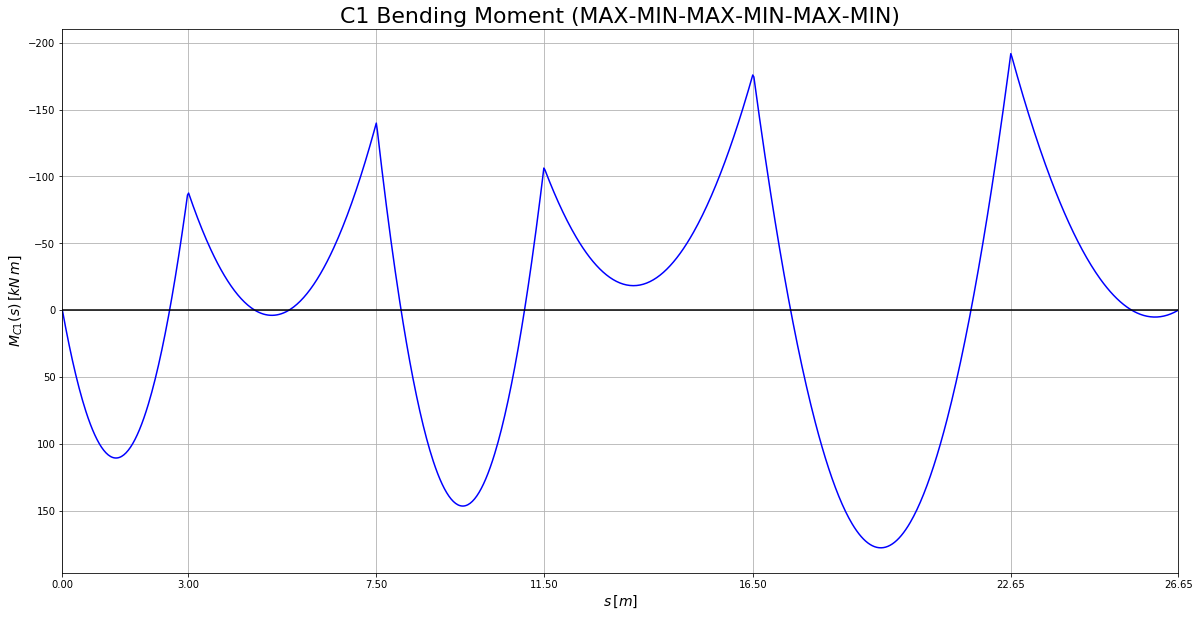

In [44]:
s = np.linspace(0,26.65, num=1000)
MC1 = M1*Q1max_slu + M2*Q1min_slu + M3*Q1max_slu + M4*Q2min_slu + M5*Q3max_slu + M6*Q3min_slu

#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, MC1, color='blue')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_{C1}(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('C1 Bending Moment (MAX-MIN-MAX-MIN-MAX-MIN)', fontsize='22')
plt.show()

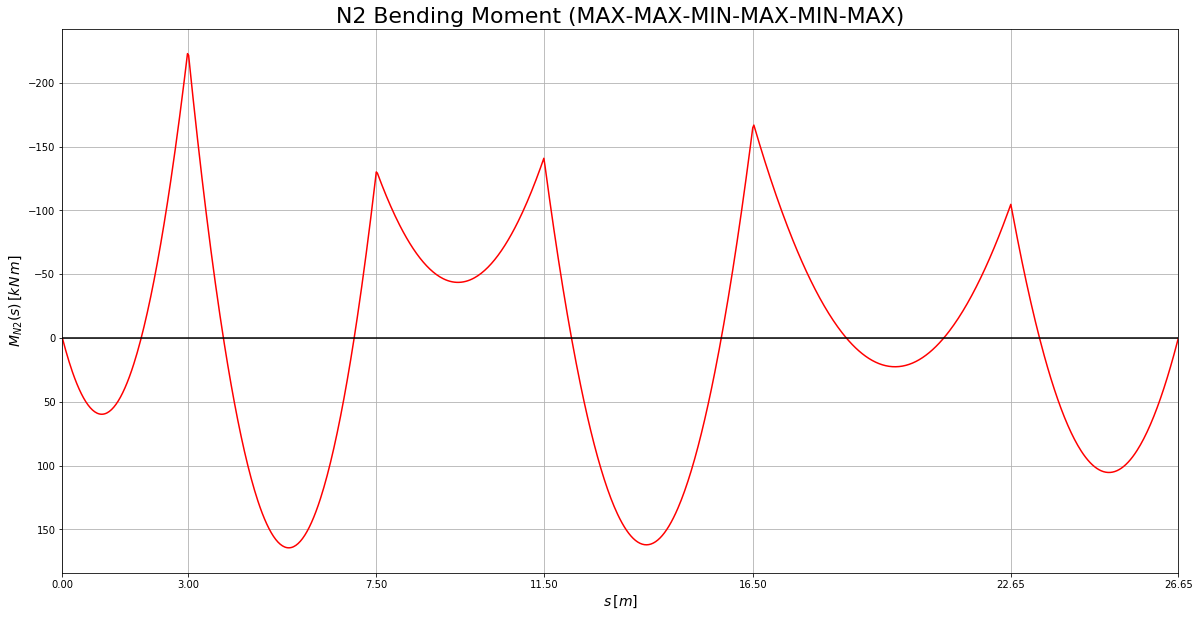

In [45]:
s = np.linspace(0,26.65, num=1000)
MN2 = M1*Q1max_slu + M2*Q1max_slu + M3*Q1min_slu + M4*Q2max_slu + M5*Q3min_slu + M6*Q3max_slu

#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, MN2, color='red')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_{N2}(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('N2 Bending Moment (MAX-MAX-MIN-MAX-MIN-MAX)', fontsize='22')
plt.show()

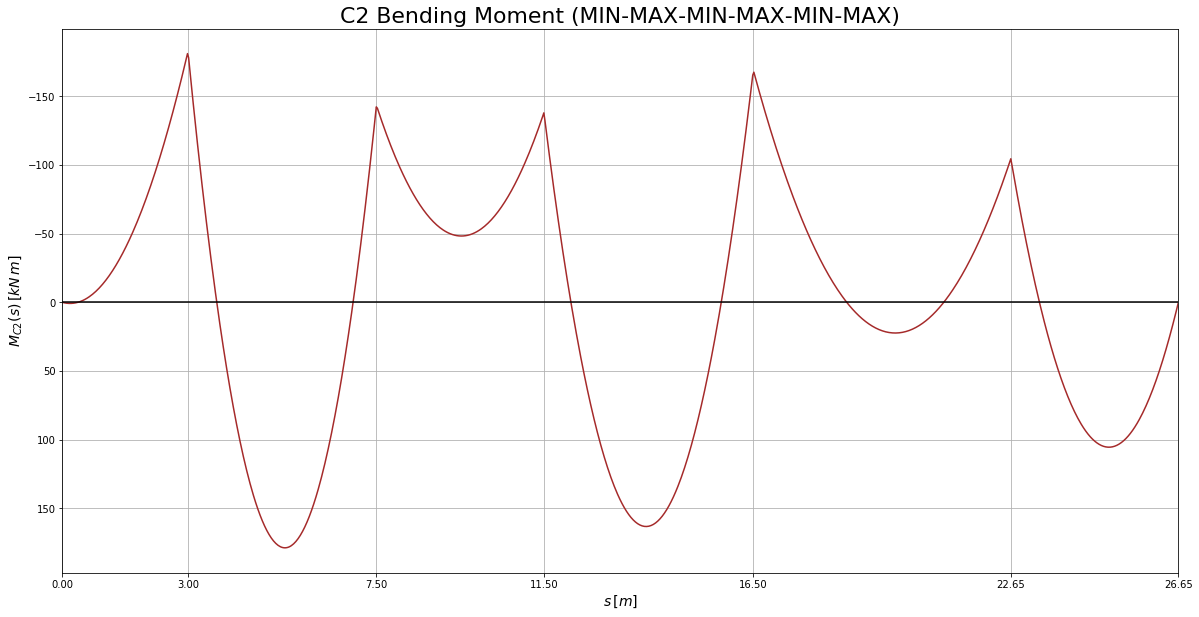

In [46]:
s = np.linspace(0,26.65, num=1000)
MC2 = M1*Q1min_slu + M2*Q1max_slu + M3*Q1min_slu + M4*Q2max_slu + M5*Q3min_slu + M6*Q3max_slu

#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, MC2, color='brown')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_{C2}(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('C2 Bending Moment (MIN-MAX-MIN-MAX-MIN-MAX)', fontsize='22')
plt.show()

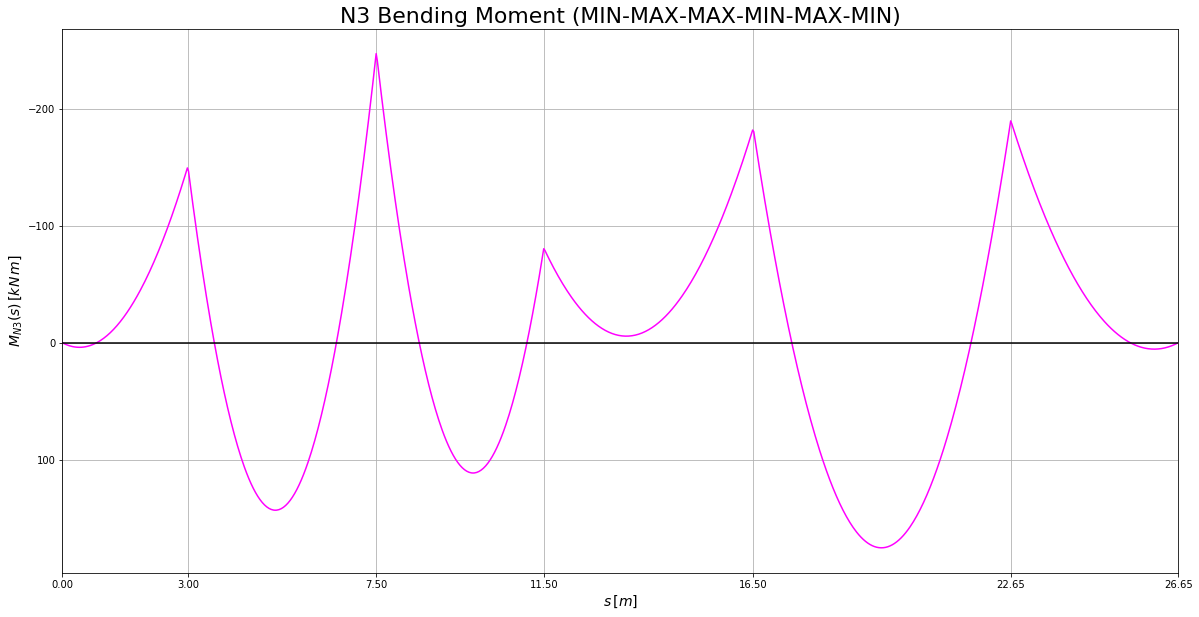

In [47]:
s = np.linspace(0,26.65, num=1000)
MN3 = M1*Q1min_slu + M2*Q1max_slu + M3*Q1max_slu + M4*Q2min_slu + M5*Q3max_slu + M6*Q3min_slu

#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, MN3, color='magenta')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_{N3}(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('N3 Bending Moment (MIN-MAX-MAX-MIN-MAX-MIN)', fontsize='22')
plt.show()

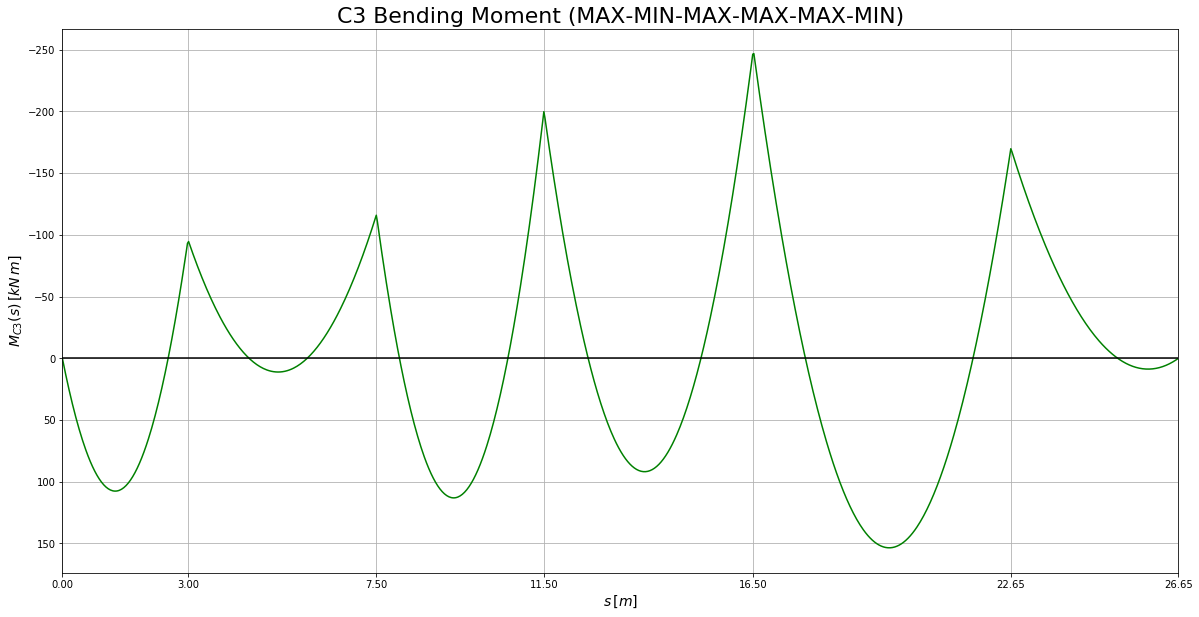

In [48]:
s = np.linspace(0,26.65, num=1000)
MC3 = M1*Q1max_slu + M2*Q1min_slu + M3*Q1max_slu + M4*Q2max_slu + M5*Q3max_slu + M6*Q3min_slu

#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, MC3, color='green')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_{C3}(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('C3 Bending Moment (MAX-MIN-MAX-MAX-MAX-MIN)', fontsize='22')
plt.show()

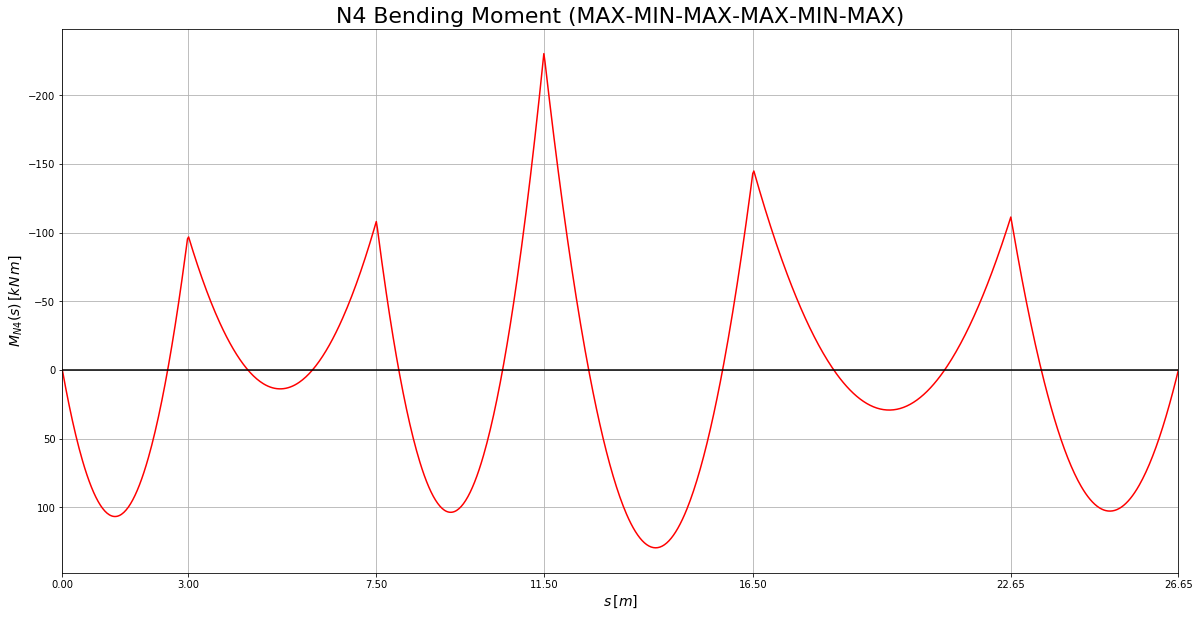

In [49]:
s = np.linspace(0,26.65, num=1000)
MN4 = M1*Q1max_slu + M2*Q1min_slu + M3*Q1max_slu + M4*Q2max_slu + M5*Q3min_slu + M6*Q3max_slu

#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, MN4, color='red')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_{N4}(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('N4 Bending Moment (MAX-MIN-MAX-MAX-MIN-MAX)', fontsize='22')
plt.show()

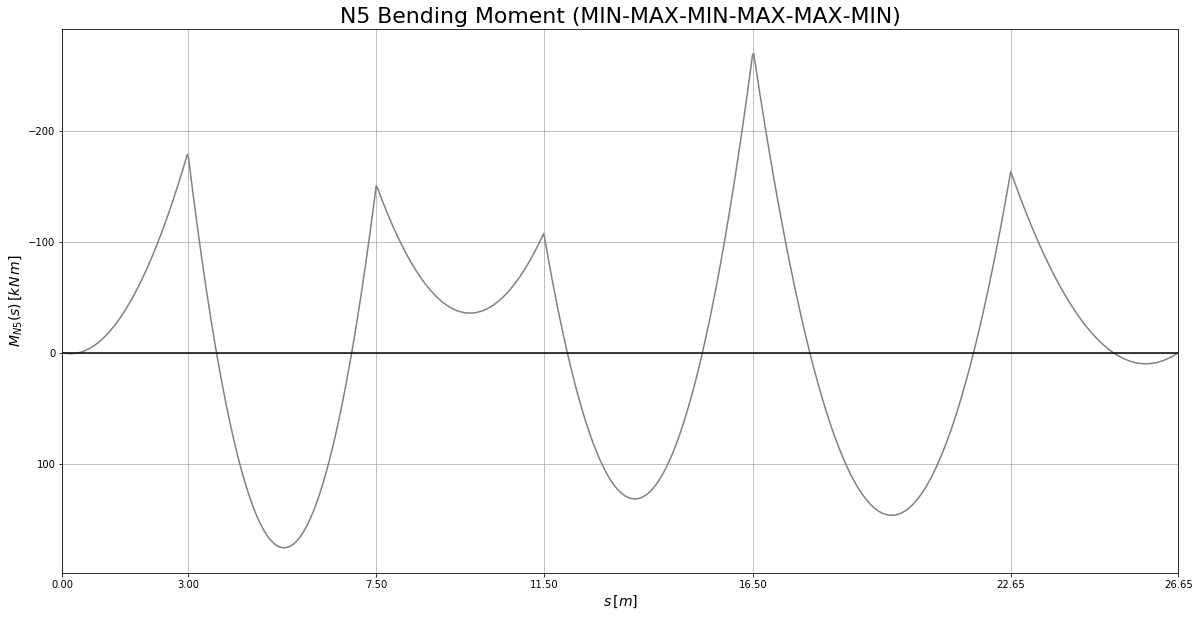

In [50]:
s = np.linspace(0,26.65, num=1000)
MN5 = M1*Q1min_slu + M2*Q1max_slu + M3*Q1min_slu + M4*Q2max_slu + M5*Q3max_slu + M6*Q3min_slu

#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, MN5, color='gray')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_{N5}(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('N5 Bending Moment (MIN-MAX-MIN-MAX-MAX-MIN)', fontsize='22')
plt.show()

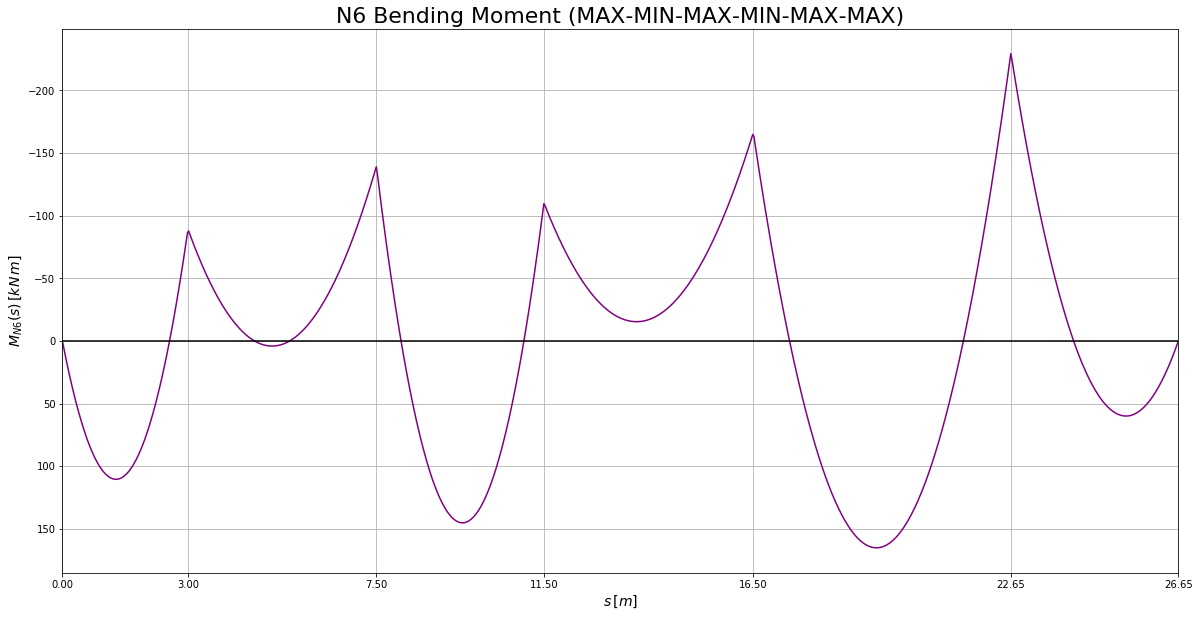

In [51]:
s = np.linspace(0,26.65, num=1000)
MN6 = M1*Q1max_slu + M2*Q1min_slu + M3*Q1max_slu + M4*Q2min_slu + M5*Q3max_slu + M6*Q3max_slu

#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, MN6, color='purple')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_{N6}(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('N6 Bending Moment (MAX-MIN-MAX-MIN-MAX-MAX)', fontsize='22')
plt.show()

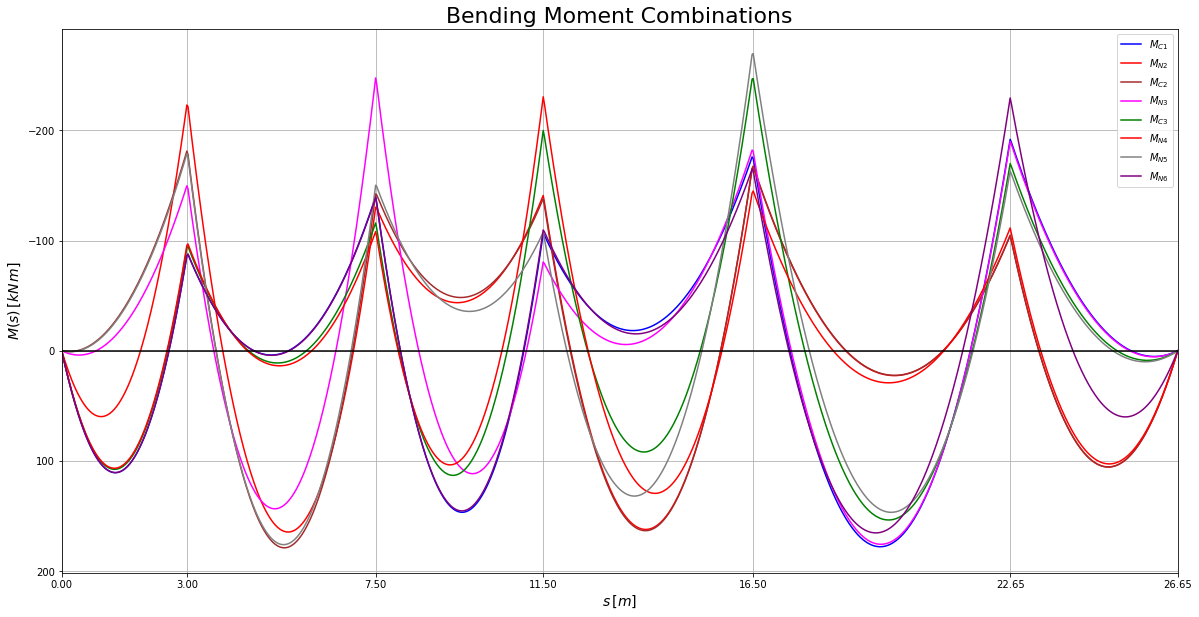

In [52]:
plt.figure(figsize=(20,10))
plt.plot(s, MC1, color='blue', label=r'$M_{C1}$')
plt.plot(s, MN2, color='red', label=r'$M_{N2}$')
plt.plot(s, MC2, color='brown', label=r'$M_{C2}$')
plt.plot(s, MN3, color='magenta', label=r'$M_{N3}$')
plt.plot(s, MC3, color='green' , label=r'$M_{C3}$')
plt.plot(s, MN4, color='red', label=r'$M_{N4}$')
plt.plot(s, MN5, color='gray', label=r'$M_{N5}$')
plt.plot(s, MN6, color='purple', label=r'$M_{N6}$')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.legend()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M (s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Bending Moment Combinations', fontsize='22')
plt.show()

In [53]:
Mmax = np.zeros(1000)
Mmin = np.zeros(1000)
for i in range (0, 999):
    Mmax[i] = max(MC1[i], MN2[i], MC2[i], MN3[i], MC3[i], MN4[i], MN5[i], MN6[i])
    if Mmax[i] < 0:
        Mmax[i]=0
    Mmin[i] = min(MC1[i], MN2[i], MC2[i], MN3[i], MC3[i], MN4[i], MN5[i], MN6[i])
    if Mmin[i] > 0:
        Mmin[i]=0

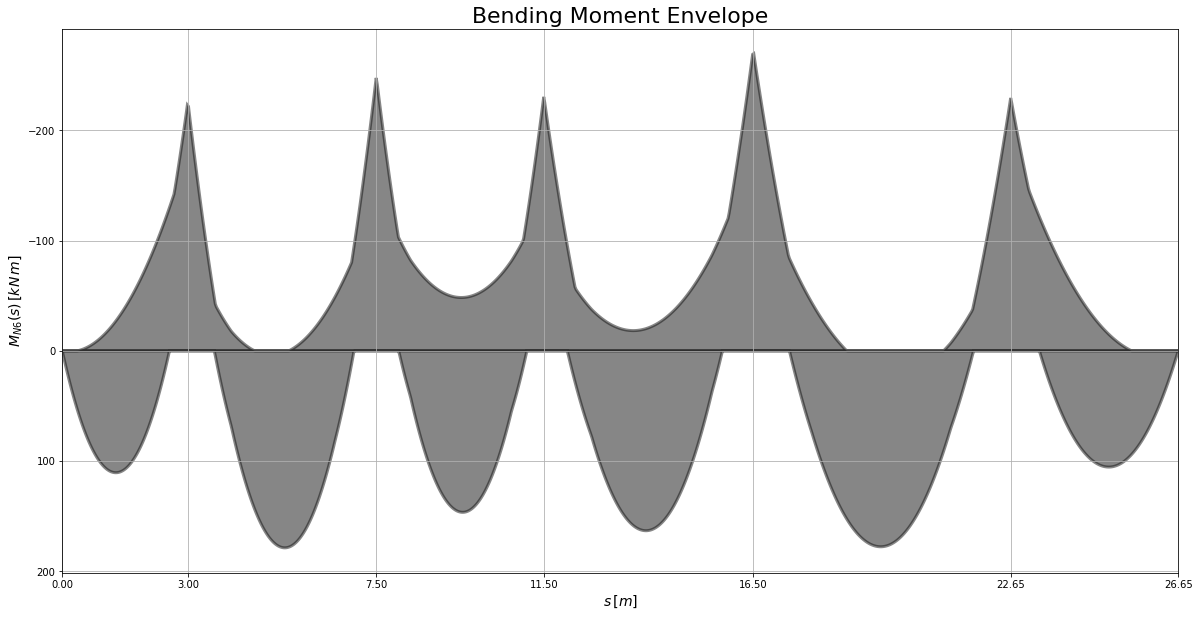

In [54]:
plt.figure(figsize=(20,10))
plt.fill(s, Mmax, linewidth='3', color='#0f0f0f80')
plt.fill(s, Mmin, linewidth='3', color='#0f0f0f80')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_{N6}(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
#plt.axhline(0, color='black')
plt.title('Bending Moment Envelope', fontsize='22')
plt.show()

In [57]:
MC1max = max(Mmax[0:112])
print('MC1max = ', MC1max, 'kN m', '\n')

MN2min = min(Mmin[0:224])
print('MN2min = ', MN2min, 'kN m', '\n')

MC2max = max(Mmax[112:281])
print('MC2max = ', MC2max, 'kN m', '\n')

MC2min = max(Mmin[112:281])
print('MC2min = ', MC2min, 'kN m', '\n')

MN3min = min(Mmin[250:374])
print('MN3min = ', MN3min, 'kN m', '\n')

MC3max = max(Mmax[281:431])
print('MC3max = ', MC3max, 'kN m', '\n')

MC3min = max(Mmin[281:431])
print('MC3min = ', MC3min, 'kN m', '\n')

MN4min = min(Mmin[374:500])
print('MN4min = ', MN4min, 'kN m', '\n')

MC4max = max(Mmax[431:618])
print('MC4max = ', MC4max, 'kN m', '\n')

MC4min = max(Mmin[431:618])
print('MC4min = ', MC4min, 'kN m', '\n')

MN5min = min(Mmin[500:650])
print('MN5min = ', MN5min, 'kN m', '\n')

MC5max = max(Mmax[618:849])
print('MC5max = ', MC5max, 'kN m', '\n')

MC5min = max(Mmin[618:849])
print('MC5min = ', MC5min, 'kN m', '\n')

MN6min = min(Mmin[650::])
print('MN6min = ', MN6min, 'kN m', '\n')

MC6max = max(Mmax[849::])
print('MC6max = ', MC6max, 'kN m', '\n')


MC1max =  110.60340713515502 kN m 

MN2min =  -222.86832364774546 kN m 

MC2max =  178.72291419349162 kN m 

MC2min =  0.0 kN m 

MN3min =  -247.47829029473806 kN m 

MC3max =  146.5170621945404 kN m 

MC3min =  -48.30358559984089 kN m 

MN4min =  -230.3653692687441 kN m 

MC4max =  163.20131552986734 kN m 

MC4min =  -18.28865576094939 kN m 

MN5min =  -269.50574426410896 kN m 

MC5max =  177.75671402668806 kN m 

MC5min =  0.0 kN m 

MN6min =  -229.3184362325153 kN m 

MC6max =  105.4685876325258 kN m 



In [97]:
MEd = pd.DataFrame([
    ['Section','MEd+ [kN m]', 'MEd- [kN m]'],
    ['C1', MC1max, 0],
    ['N2', 0, MN2min], 
    ['C2', MC2max, MC2min],
    ['N3', 0, MN3min], 
    ['C3', MC3max, MC3min],
    ['N4', 0, MN4min], 
    ['C4', MC4max, MC4min],
    ['N5', 0, MN5min], 
    ['C5', MC5max, MC5min],
    ['N6', 0, MN6min], 
    ['C6', MC6max, 0],
])
MEd.columns = MEd.iloc[0]
MEd = MEd.drop([0])
MEd = MEd.set_index('Section')
MEd

,MEd+ [kN m],MEd- [kN m]
Section,,
C1,110.603,0
N2,0,-222.868
C2,178.723,0
N3,0,-247.478
C3,146.517,-48.3036
N4,0,-230.365
C4,163.201,-18.2887
N5,0,-269.506
C5,177.757,0


---
## SHEAR

---
#### Load on Span 1

In [130]:
R_1 = (R1[0] - 1 * s) * (Hv(s) - Hv(s-3)) + R1[1] * (Hv(s-3) - Hv(s-(3+4.5))) + R1[2]*(Hv(s-(3+4.5)) - Hv(s-(3+4.5+4)))+ R1[3]*(Hv(s-(3+4.5+4)) - Hv(s-(3+4.5+4+5)))+ R1[4]*(Hv(s-(3+4.5+4+5)) - Hv(s-(3+4.5+4+5+6.15))) +  R1[5]*(Hv(s-(3+4.5+4+5+6.15)) - Hv(s-(3+4.5+4+5+6.15+4)))

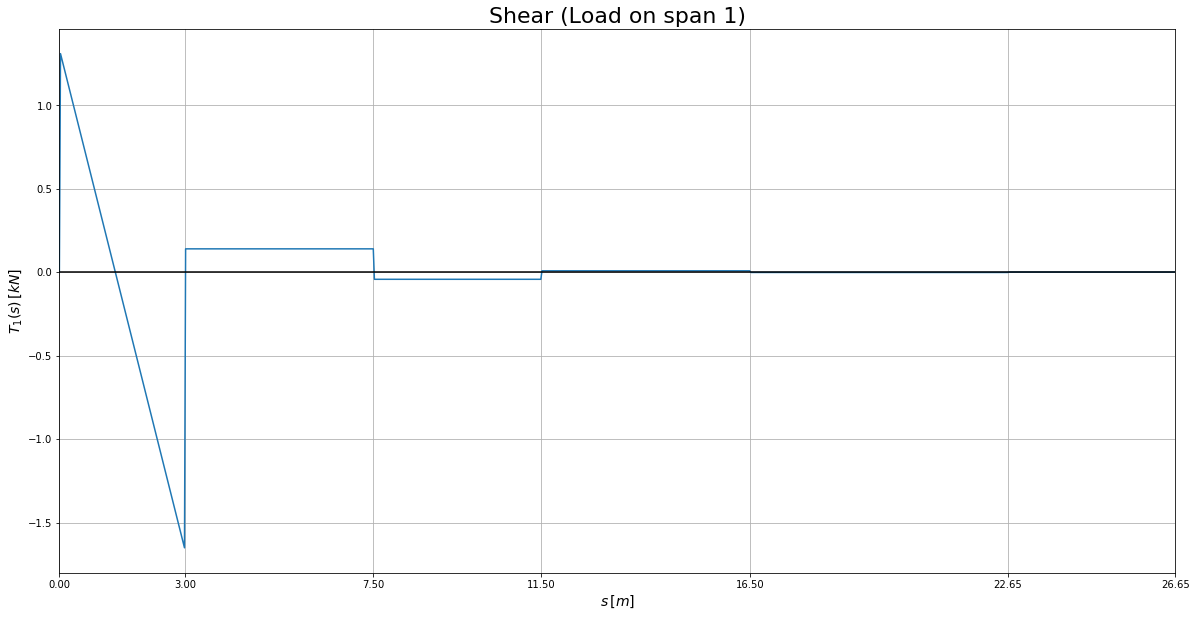

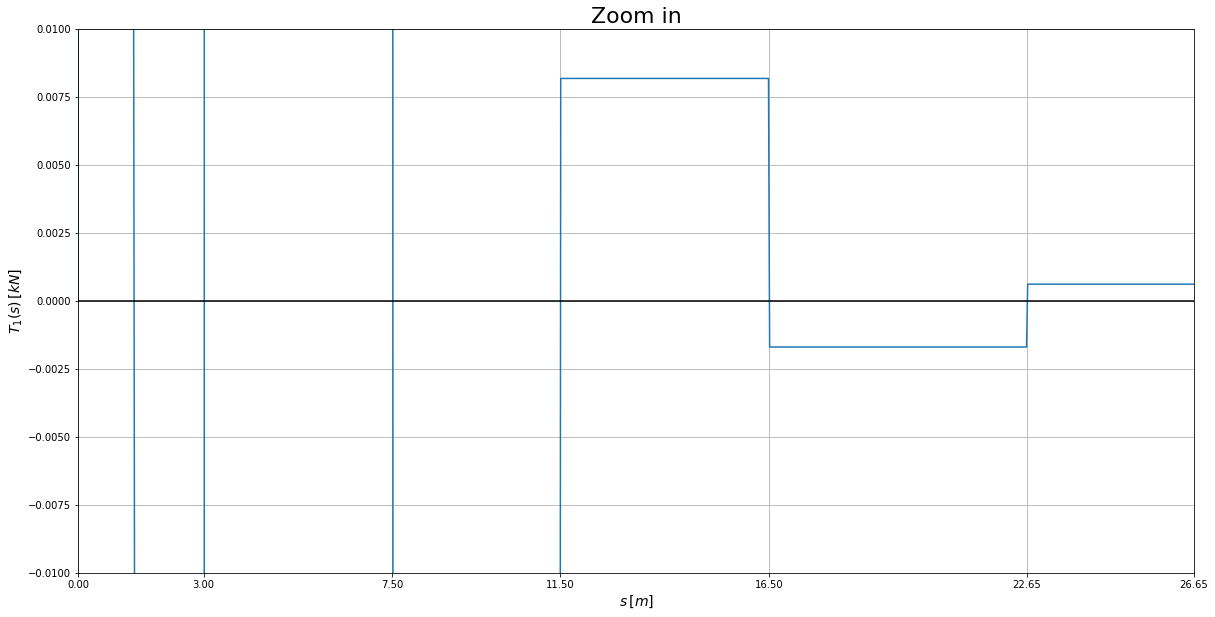

In [131]:
plt.figure(figsize=(20,10))
plt.plot(s, R_1, )
plt.xlim(s.min(), s.max())
#plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$T_1(s)\,[kN]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Shear (Load on span 1)', fontsize='22')
plt.show()

#-----------ZOOM IN----------------
plt.figure(figsize=(20,10))
plt.plot(s, R_1, )
plt.xlim(s.min(), s.max())
plt.ylim(-.01, .01)
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$T_1(s)\,[kN]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.grid()
plt.axhline(0, color='black')
plt.title('Zoom in', fontsize='22')
plt.show()

---
#### Load on Span 2

In [147]:
R_2 = R2[0] * (Hv(s) - Hv(s-3)) + (R2[1] - 1*(s-3)) * (Hv(s-3) - Hv(s-(3+4.5))) + R2[2]*(Hv(s-(3+4.5)) - Hv(s-(3+4.5+4)))+ R2[3]*(Hv(s-(3+4.5+4)) - Hv(s-(3+4.5+4+5)))+ R2[4]*(Hv(s-(3+4.5+4+5)) - Hv(s-(3+4.5+4+5+6.15))) +  R2[5]*(Hv(s-(3+4.5+4+5+6.15)) - Hv(s-(3+4.5+4+5+6.15+4)))

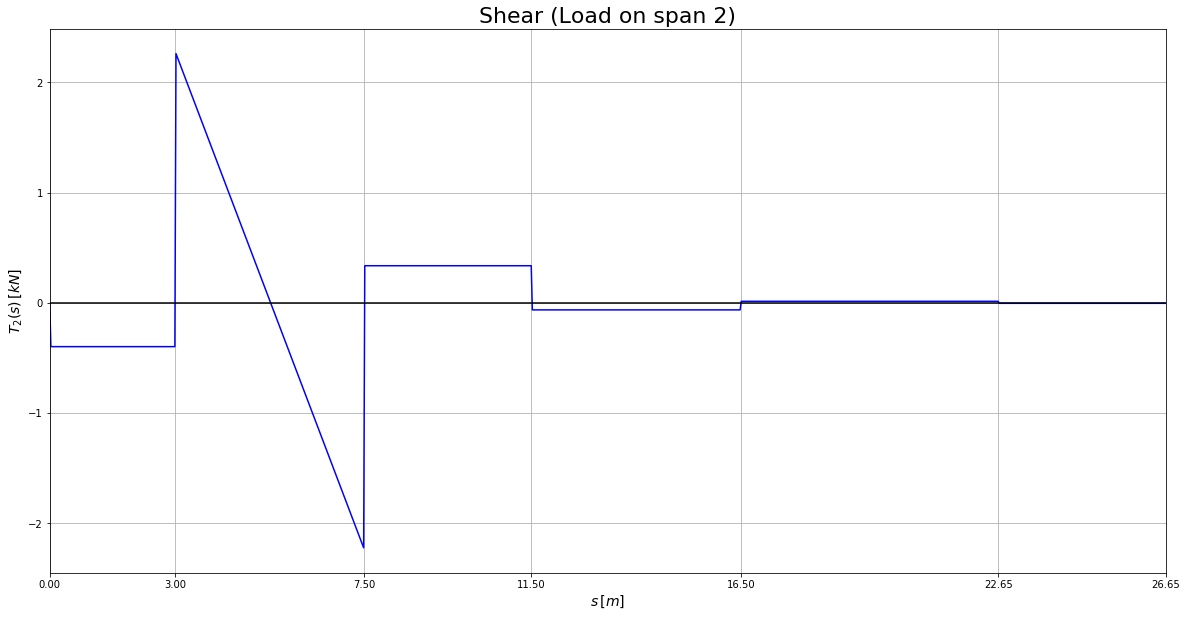

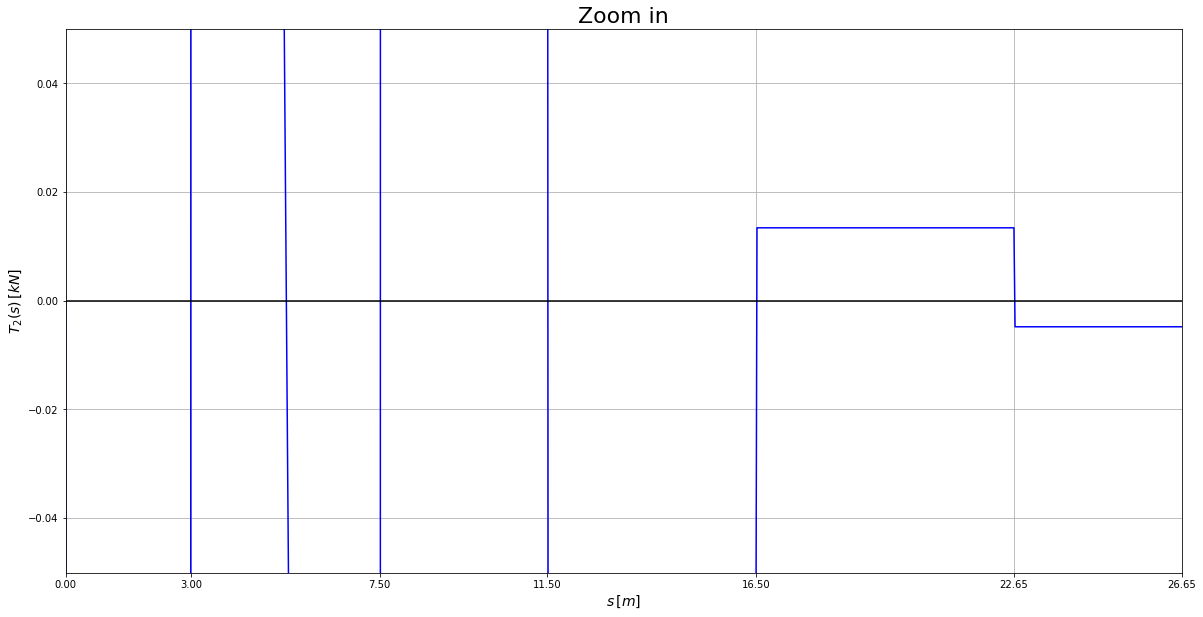

In [152]:
plt.figure(figsize=(20,10))
plt.plot(s, R_2, 'b')
plt.xlim(s.min(), s.max())
#plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$T_2(s)\,[kN]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Shear (Load on span 2)', fontsize='22')
plt.show()

#-----------ZOOM IN----------------
plt.figure(figsize=(20,10))
plt.plot(s, R_2, 'b')
plt.xlim(s.min(), s.max())
plt.ylim(-.05, .05)
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$T_2(s)\,[kN]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.grid()
plt.axhline(0, color='black')
plt.title('Zoom in', fontsize='22')
plt.show()

---
#### Load on Span 3

In [154]:
R_3 = R3[0] * (Hv(s) - Hv(s-3)) + (R3[1] - 0*(s-3)) * (Hv(s-3) - Hv(s-(3+4.5))) + (R3[2] - 1*(s-(3+4.5)))*(Hv(s-(3+4.5)) - Hv(s-(3+4.5+4)))+ R3[3]*(Hv(s-(3+4.5+4)) - Hv(s-(3+4.5+4+5)))+ R3[4]*(Hv(s-(3+4.5+4+5)) - Hv(s-(3+4.5+4+5+6.15))) +  R3[5]*(Hv(s-(3+4.5+4+5+6.15)) - Hv(s-(3+4.5+4+5+6.15+4)))

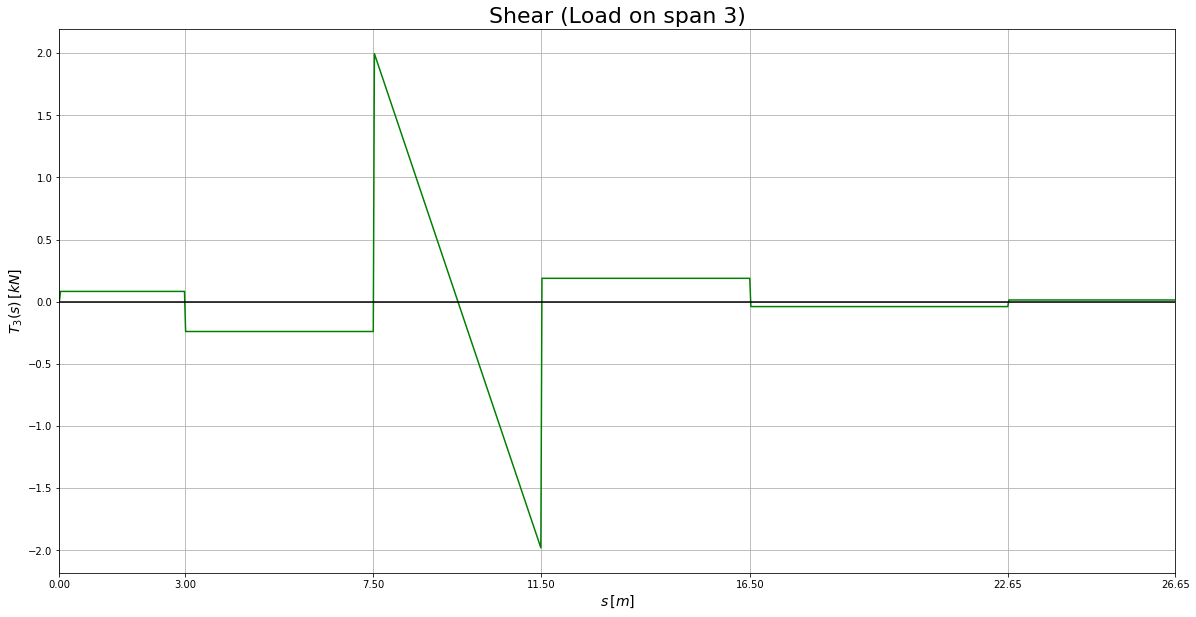

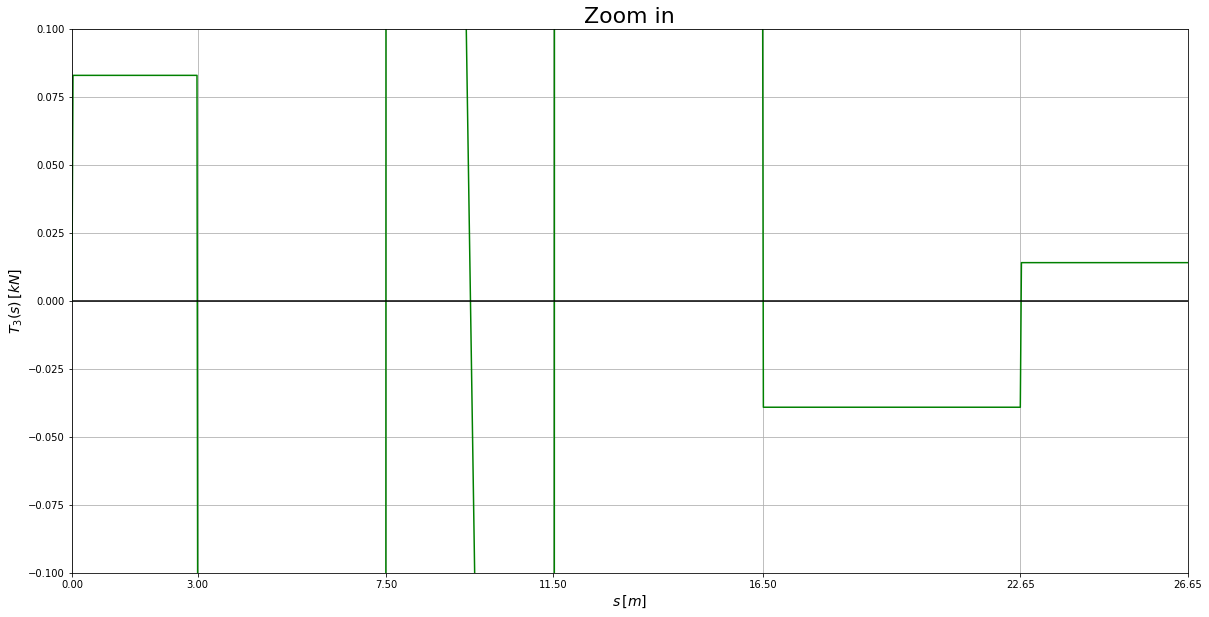

In [156]:
plt.figure(figsize=(20,10))
plt.plot(s, R_3, 'g')
plt.xlim(s.min(), s.max())
#plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$T_3(s)\,[kN]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Shear (Load on span 3)', fontsize='22')
plt.show()

#-----------ZOOM IN----------------
plt.figure(figsize=(20,10))
plt.plot(s, R_3, 'g')
plt.xlim(s.min(), s.max())
plt.ylim(-.1, .1)
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$T_3(s)\,[kN]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.grid()
plt.axhline(0, color='black')
plt.title('Zoom in', fontsize='22')
plt.show()

---
#### Load on Span 4

In [158]:
R_4 = R4[0] * (Hv(s) - Hv(s-3)) + (R4[1] - 0*(s-3)) * (Hv(s-3) - Hv(s-(3+4.5))) + (R4[2] - 0*(s-(3+4.5)))*(Hv(s-(3+4.5)) - Hv(s-(3+4.5+4)))+ (R4[3] - 1*(s-(3+4.5+4)))*(Hv(s-(3+4.5+4)) - Hv(s-(3+4.5+4+5)))+ R4[4]*(Hv(s-(3+4.5+4+5)) - Hv(s-(3+4.5+4+5+6.15))) +  R4[5]*(Hv(s-(3+4.5+4+5+6.15)) - Hv(s-(3+4.5+4+5+6.15+4)))

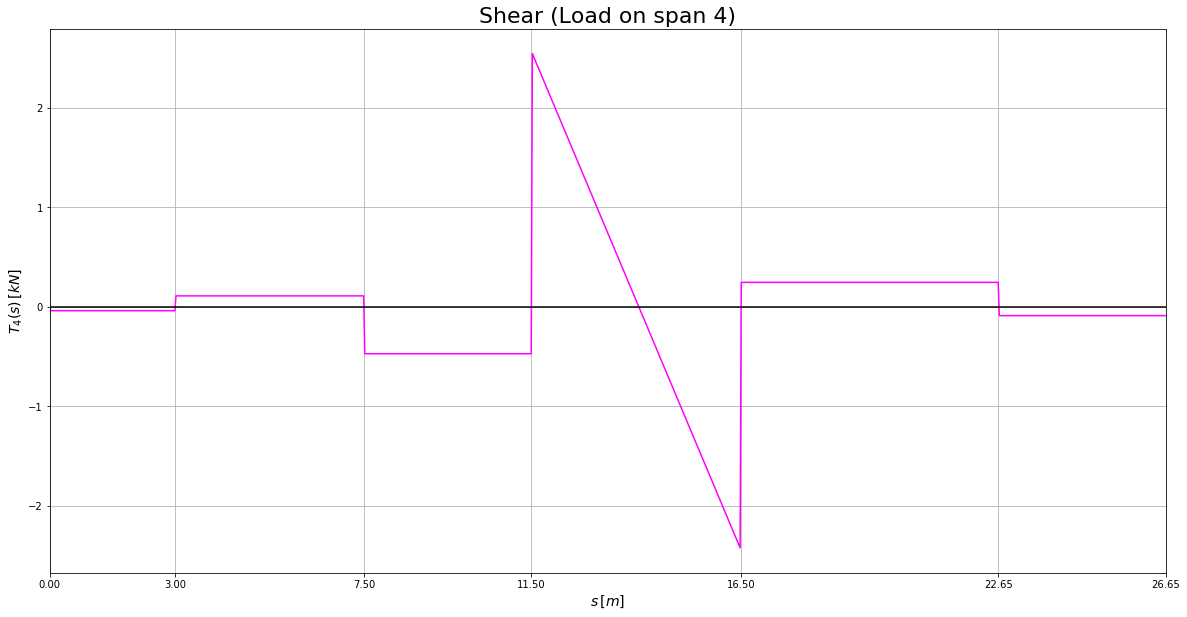

In [162]:
plt.figure(figsize=(20,10))
plt.plot(s, R_4, 'magenta')
plt.xlim(s.min(), s.max())
#plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$T_4(s)\,[kN]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Shear (Load on span 4)', fontsize='22')
plt.show()
